<a href="https://colab.research.google.com/github/Taenyoung-Lee/23-KAIST-AI-College/blob/main/titanic(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Mahine with titanic

## 1. Import packages


### 필요한 패키지들 import
- np, plt, pd

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset
- 파일 경로 각자 맞춰서 설정
- 드라이브 마운트

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/prac_colab/titanic_folder/titanic

In [99]:
import os
os.chdir('/content/drive/MyDrive/prac_colab/titanic_folder/titanic')
#상대경로
df = pd.read_csv("train.csv")

In [100]:
#절대경로
df = pd.read_csv("/content/drive/MyDrive/prac_colab/titanic_folder/titanic/train.csv")

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp:	# of siblings / spouses aboard the Titanic
- parch:	# of parents / children aboard the Titanic
- ticket:	Ticket number
- cabin:	Cabin number
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [102]:
# 불러들여온 csv 파일 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### HINT : 그래프를 이용한 데이터 분석
- 아래 함수를 이용, 각 컬럼간의 상관관계를 분석
- matplotlib, seaborn 라이브러리를 활용
- Survived  컬럼과 다른 컬럼간의 상관 관계를 분석해본다.


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bar_chart(data,feature) :
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = False, figsize = (10,5))

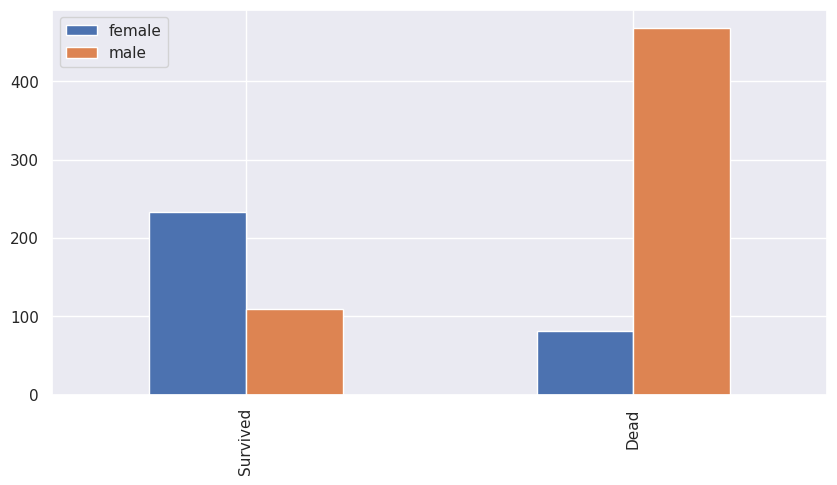

In [104]:
# 사용
bar_chart(df,'Sex')

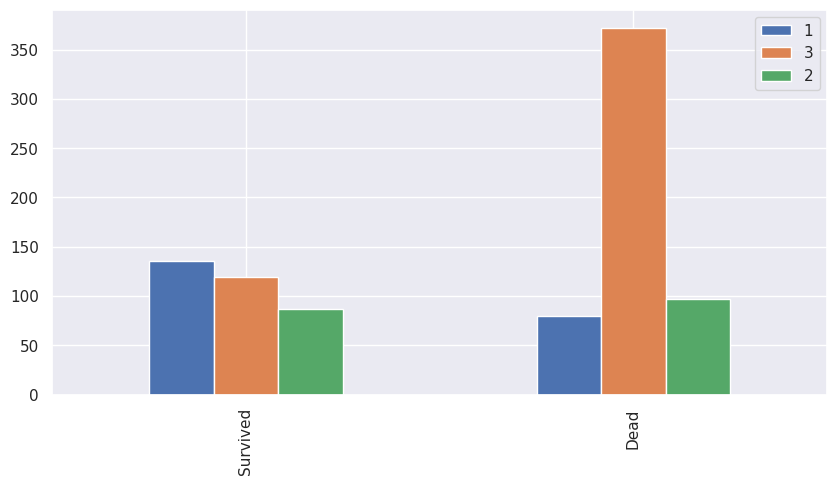

In [105]:
# 사용
bar_chart(df,'Pclass')

In [106]:
df_imputed = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Sex"]]

n_df = df_imputed.replace({"Sex": "male"},1)
n_df = n_df.replace({"Sex": "female"},0)
print(n_df)

     Survived  Pclass   Age  SibSp  Parch  Sex
0           0       3  22.0      1      0    1
1           1       1  38.0      1      0    0
2           1       3  26.0      0      0    0
3           1       1  35.0      1      0    0
4           0       3  35.0      0      0    1
..        ...     ...   ...    ...    ...  ...
886         0       2  27.0      0      0    1
887         1       1  19.0      0      0    0
888         0       3   NaN      1      2    0
889         1       1  26.0      0      0    1
890         0       3  32.0      0      0    1

[891 rows x 6 columns]


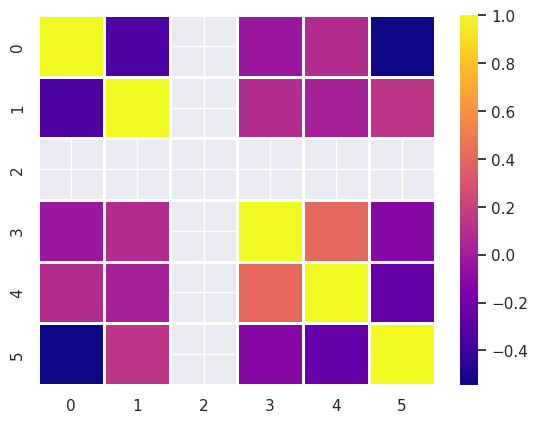

In [107]:
corr_matrix = np.corrcoef(n_df, rowvar=False)
sns.heatmap(corr_matrix,linewidth=1,cmap='plasma')
plt.show()

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

## 2. Data Preprocessing

### 데이터 확인
- 각 데이터의 결측치, 비어있는 값 등을 확인해본다.
- 쓸모 없는 값은 버리거나(drop) 채우거나 ?
- 숫자 데이터가 아닌 값들은 숫자로 바꿔준다든지?

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

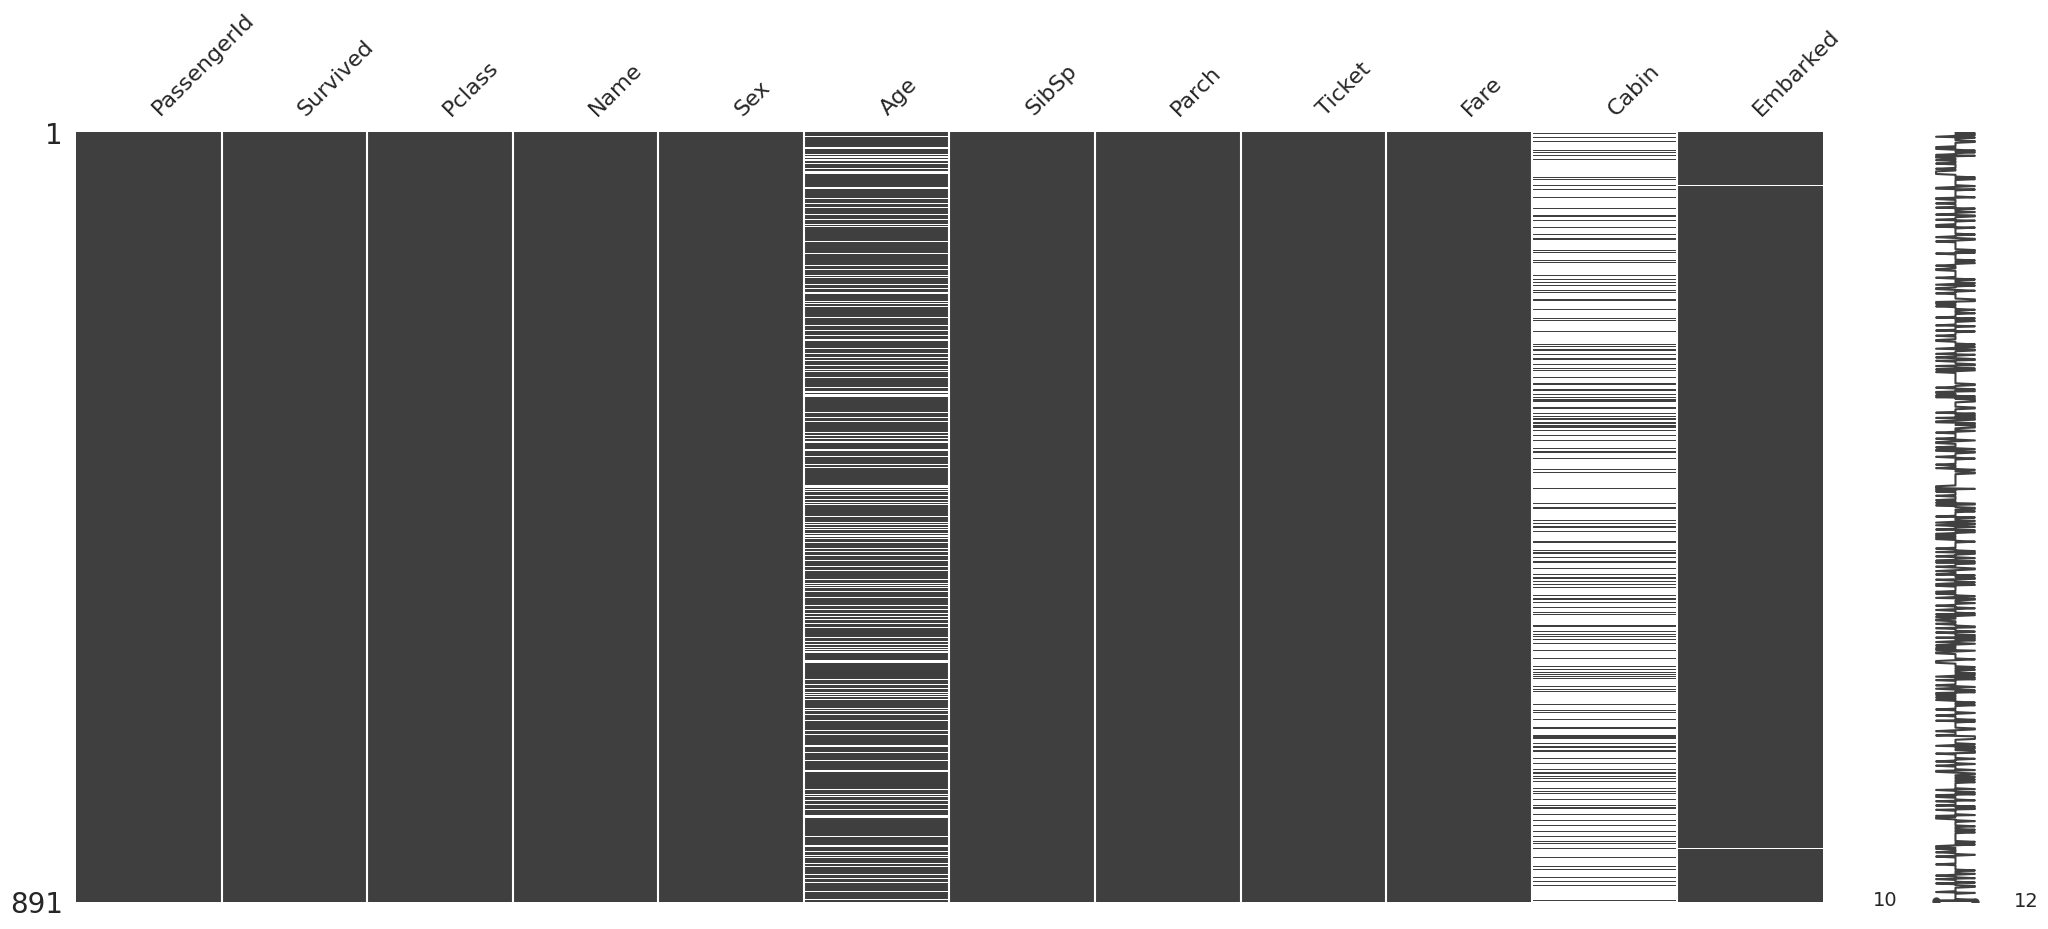

In [112]:
import missingno as msno

msno.matrix(df)
plt.show()

In [113]:
X.Cabin.value_counts().sort_values()

B102           1
C99            1
B94            1
C87            1
D15            1
              ..
E101           3
F2             3
C23 C25 C27    4
G6             4
B96 B98        4
Name: Cabin, Length: 147, dtype: int64

In [114]:
X.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [115]:
X_ = X.iloc[:,[0,2,3,4,5,7,9]]
X_.shape

(891, 7)

In [116]:
X_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [117]:
X_.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [118]:
X_.loc[:,'Age'] = X_['Age'].fillna(X_['Age'].mean()) #나이의 null값을 평균값으로 대체해버림

<ipython-input-118-39a5c2032015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_.loc[:,'Age'] = X_['Age'].fillna(X_['Age'].mean()) #나이의 null값을 평균값으로 대체해버림


In [119]:
X_.Embarked.value_counts().sort_values()

Q     77
C    168
S    644
Name: Embarked, dtype: int64

In [120]:
X_.loc[:,'Embarked']=X_['Embarked'].fillna('S') #Embarked의 null값을 최빈값으로 대체해버림

<ipython-input-120-b3237f7845bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_.loc[:,'Embarked']=X_['Embarked'].fillna('S') #Embarked의 null값을 최빈값으로 대체해버림


In [121]:
X_.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [122]:
X_.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S


In [132]:
Pclass=pd.get_dummies(X_.Pclass)
Sex=pd.get_dummies(X_.Sex)
Embarked=pd.get_dummies(X_.Embarked)

X_new = pd.concat([X_,Pclass],axis=1)
X_new = pd.concat([X_new,Sex],axis=1)
X_new = pd.concat([X_new,Embarked],axis=1)

In [133]:
X_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [135]:
del X_new['Pclass']
del X_new['Sex']
del X_new['Embarked']

In [136]:
X_new.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [127]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
 4   1       891 non-null    uint8  
 5   2       891 non-null    uint8  
 6   3       891 non-null    uint8  
 7   female  891 non-null    uint8  
 8   male    891 non-null    uint8  
 9   C       891 non-null    uint8  
 10  Q       891 non-null    uint8  
 11  S       891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 34.9 KB


In [128]:
# 아래에서 어떤 오류가 발생한다면, 어떻게 처리해주면 좋을까요?

In [137]:
print(X_new)

           Age  SibSp  Parch     Fare  1  2  3  female  male  C  Q  S
0    22.000000      1      0   7.2500  0  0  1       0     1  0  0  1
1    38.000000      1      0  71.2833  1  0  0       1     0  1  0  0
2    26.000000      0      0   7.9250  0  0  1       1     0  0  0  1
3    35.000000      1      0  53.1000  1  0  0       1     0  0  0  1
4    35.000000      0      0   8.0500  0  0  1       0     1  0  0  1
..         ...    ...    ...      ... .. .. ..     ...   ... .. .. ..
886  27.000000      0      0  13.0000  0  1  0       0     1  0  0  1
887  19.000000      0      0  30.0000  1  0  0       1     0  0  0  1
888  29.699118      1      2  23.4500  0  0  1       1     0  0  0  1
889  26.000000      0      0  30.0000  1  0  0       0     1  1  0  0
890  32.000000      0      0   7.7500  0  0  1       0     1  0  1  0

[891 rows x 12 columns]


## Split into train, validation, test set
- 전처리를 끝내고 난 뒤에는 데이터를 train, validation, test set 으로 나눠준다.

In [138]:
X_new.columns = X_new.columns.astype(str)
print(X_new.columns)

Index(['Age', 'SibSp', 'Parch', 'Fare', '1', '2', '3', 'female', 'male', 'C',
       'Q', 'S'],
      dtype='object')


In [139]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#전체 데이터셋을 TRAIN + TEST 로 나눔
# 전체 data set을 (training + validation), test으로 나눔
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new,y )

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid =train_test_split(X_train_val,y_train_val)

# 각 세트의 크기를 출력한다.
print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 501,  size of validation set: 167,  size of test set: 223


## 3. Test with validation set

In [145]:
best_score = 0
for _gamma in [0.001, 0.01,0.1, 1, 10, 100]:
  for _c in [0.001, 0.01,0.1, 1, 10, 100]:
    svm = SVC(gamma=_gamma, C=_c)
    svm.fit(X_train, y_train)
    score = svm.score(X_valid,y_valid)
    if score > best_score:
      best_score = score
      best_parameter = {"C":_c, 'gamma':_gamma}

In [146]:
print(score, best_parameter)

0.6467065868263473 {'C': 10, 'gamma': 0.1}


In [148]:
# training set과 validation set을 합쳐 모델을 다시 만든 후
# test set을 이용하여 모델을 평가
svm = SVC(**best_parameter)
svm.fit(X_train_val,y_train_val)
test_score = svm.score(X_test,y_test)

print(test_score)

0.7354260089686099


## 4. Test with  Cross Validation
- 위의 결과를 참고해서 grid search를 진행합니다.
- parma_grid의 gamma와 C 값을 임의로 넣고 돌려보세요


In [149]:
param_grid = {'C':[0.0001,0.001,0.01,0.1,0.5,0,1,5,10,50,100,500,1000] ,
              'gamma':[0.0001,0.001,0.01,0.1,0.5,0,1,5,10,50,100,500,1000] }
param_grid

{'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
 'gamma': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


grid_search = GridSearchCV(SVC(),param_grid,cv=5)


# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state=1)



# fit
grid_search.fit(X_train,y_train)
# evaluate
print(grid_search.score(X_test,y_test))
print(grid_search.score(X_train,y_train))

print("최적 매개변수 : ",grid_search.best_params_)
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

0.7802690582959642
0.8488023952095808
최적 매개변수 :  {'C': 100, 'gamma': 0.001}
최상 교차검증 점수 :  0.8054314891706881
최고 성능 모델 :  SVC(C=100, gamma=0.001)


### 결과 확인


In [155]:
import pandas as pd
from IPython.display import display

results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027206,0.005578,0.010269,0.000328,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.634328,0.626866,0.626866,0.631579,0.631579,0.630244,0.002935,91
1,0.023925,0.000823,0.010677,0.000413,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.634328,0.626866,0.626866,0.631579,0.631579,0.630244,0.002935,91
2,0.027446,0.003695,0.011591,0.001041,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.634328,0.626866,0.626866,0.631579,0.631579,0.630244,0.002935,91
3,0.026260,0.000574,0.013534,0.002080,0.001,0.5,"{'C': 0.001, 'gamma': 0.5}",0.634328,0.626866,0.626866,0.631579,0.631579,0.630244,0.002935,91
4,0.029321,0.004077,0.014538,0.004413,0.001,1,"{'C': 0.001, 'gamma': 1}",0.634328,0.626866,0.626866,0.631579,0.631579,0.630244,0.002935,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.022433,0.000488,0.007666,0.000307,1000,10,"{'C': 1000, 'gamma': 10}",0.634328,0.641791,0.641791,0.669173,0.639098,0.645236,0.012275,81
117,0.022235,0.001023,0.007844,0.000342,1000,50,"{'C': 1000, 'gamma': 50}",0.634328,0.634328,0.656716,0.676692,0.654135,0.651240,0.015863,70
118,0.020832,0.000585,0.007788,0.000623,1000,100,"{'C': 1000, 'gamma': 100}",0.634328,0.641791,0.656716,0.676692,0.654135,0.652733,0.014494,57
119,0.024240,0.005095,0.007709,0.000383,1000,500,"{'C': 1000, 'gamma': 500}",0.634328,0.641791,0.656716,0.684211,0.661654,0.655740,0.017318,44


In [159]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 18.2 MB/s eta 0:00:00


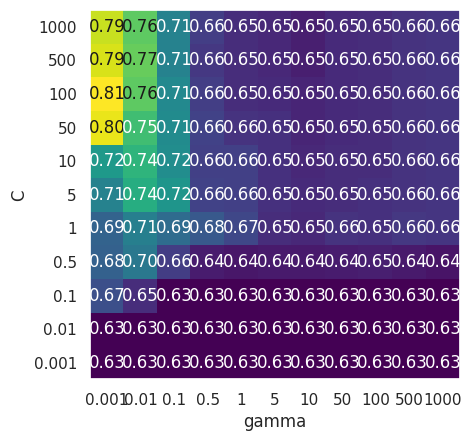

In [170]:
import mglearn
import matplotlib.pyplot as plt

# scores = [score.mean_validation_score for score in grid_search.cv_results_]
scores = results['mean_test_score'].to_numpy().reshape(11,11)
# reshape의  숫자는 gamma와 C 의 개수에 맞춰주세요

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Accuracy = ?
- grid_search.best_score_

In [171]:
print(grid_search.best_score_)

0.8054314891706881



#### non_grid search

In [172]:
print(svm.score(X_test,y_test))

0.8834080717488789
